# CNN Model

## Library yang digunakan

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

!pip install keras

from keras.models import Sequential
from keras import layers

import matplotlib.pyplot as plt
plt.style.use('ggplot')


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import math
import numpy as np

## Read dataset

Read From Drive
---
Bisa mendownload drive ini dan upload ke google drive pengguna
- https://drive.google.com/drive/folders/1R9ul8ejLAhPVenBNJhUNHQFc152NlbMK?usp=sharing


Read From Folder
---

1. Simpan folder pada lokasi yang sama dengan file .ipynb
2. Download glove dataset pada laman berikut dan simpan didalam folder
https://nlp-stanford-edu.translate.goog/projects/glove/?_x_tr_sl=auto&_x_tr_tl=id&_x_tr_hl=en&_x_tr_pto=wapp

### From Drive


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# df_labels = pd.read_csv('drive/MyDrive/data_worthcheck/labels.txt', sep="\n", header=None)

# df_labels_list = list(df_labels[0])
# df_labels_list

['no', 'yes']

In [ ]:
# df_train = pd.read_csv('drive/MyDrive/data_worthcheck/train.csv')

# df_train_key = df_train['text_a'].values
# df_train_val = df_train['label'].values

In [ ]:
# df_train_key

array(['betewe buka twitter cuman ngetweet liat home berita corona panik kepikiran ndamau buka2 home yg aware aja i ll stay at home nda rumah kalo nda penting2 banget',
       'mas piyuuu mugo2 corona tuh mulut tersumpal ma corona',
       'e100ss gini buka informasi sejelas nya identitas daerah penderita terjangkit infokan masyarakat mengisolasi nya kontak langsung penderita positif corona ditutup tutupi',
       ...,
       'virus corona menyaba depok cuci tangan makan nya biar tangan ora lengket be kena nasi',
       'mata sipit tinggal depok udah abis dah bahan cengan dikampus bangsd dikit dikit corona co amp tol',
       'i ak batuk pilek pusing demam anjir ak depok'], dtype=object)

In [ ]:
# df_train_val

array(['no', 'no', 'yes', ..., 'no', 'no', 'no'], dtype=object)

In [ ]:
df_validation = pd.read_csv('drive/MyDrive/data_worthcheck/dev.csv')

df_validation_key = df_validation['text_a'].values
df_validation_val = df_validation['label'].values

In [ ]:
# df_validation_key

array(['jek dajal ga depok bang',
       'detikcom untung depok masuk wilayah nya ridwan kamil kalo masuk wilayah nya anis abis lu bully ama buzzer kolam',
       'df dom jakarta depok yg gunain vc cabang nya cabang yg tercantum pas kesana gabisa bayar pake shopeepay',
       ...,
       '4 terawan menyebut virus corona indonesia terdeteksi minggu kemarin mendengar berita pemerintah langsung pemeriksaan covid19indonesia',
       'realffk buhari can t pronounce corona virus',
       'hadapi wabah corona pemuda muhammadiyah pemerintah cegah munculnya kepanikan'],
      dtype=object)

In [ ]:
# df_validation_val

array(['no', 'no', 'no', ..., 'yes', 'no', 'yes'], dtype=object)

In [ ]:
# df_test = pd.read_csv('drive/MyDrive/data_worthcheck/test.csv')

# df_test_key = df_test['text_a'].values
# df_test_val = df_test['label'].values

In [ ]:
# df_test_key

array(['jek dajal ga depok bang',
       'detikcom untung depok masuk wilayah nya ridwan kamil kalo masuk wilayah nya anis abis lu bully ama buzzer kolam',
       'df dom jakarta depok yg gunain vc cabang nya cabang yg tercantum pas kesana gabisa bayar pake shopeepay',
       ...,
       '4 terawan menyebut virus corona indonesia terdeteksi minggu kemarin mendengar berita pemerintah langsung pemeriksaan covid19indonesia',
       'realffk buhari can t pronounce corona virus',
       'hadapi wabah corona pemuda muhammadiyah pemerintah cegah munculnya kepanikan'],
      dtype=object)

In [ ]:
# df_test_val

array(['no', 'no', 'no', ..., 'yes', 'no', 'yes'], dtype=object)

### From Local Folder


In [ ]:
df_labels = pd.read_csv('data_worthcheck/labels.txt', sep="\n", header=None)

df_labels_list = list(df_labels[0])
df_labels_list

['no', 'yes']

In [ ]:
df_train = pd.read_csv('data_worthcheck/train.csv')

df_train_key = df_train['text_a'].values
df_train_val = df_train['label'].values

In [ ]:
df_train_key

array(['betewe buka twitter cuman ngetweet liat home berita corona panik kepikiran ndamau buka2 home yg aware aja i ll stay at home nda rumah kalo nda penting2 banget',
       'mas piyuuu mugo2 corona tuh mulut tersumpal ma corona',
       'e100ss gini buka informasi sejelas nya identitas daerah penderita terjangkit infokan masyarakat mengisolasi nya kontak langsung penderita positif corona ditutup tutupi',
       ...,
       'virus corona menyaba depok cuci tangan makan nya biar tangan ora lengket be kena nasi',
       'mata sipit tinggal depok udah abis dah bahan cengan dikampus bangsd dikit dikit corona co amp tol',
       'i ak batuk pilek pusing demam anjir ak depok'], dtype=object)

In [ ]:
df_train_val

array(['no', 'no', 'yes', ..., 'no', 'no', 'no'], dtype=object)

In [ ]:
df_validation = pd.read_csv('drive/MyDrive/data_worthcheck/dev.csv')

df_validation_key = df_validation['text_a'].values
df_validation_val = df_validation['label'].values

In [ ]:
df_validation_key

array(['jek dajal ga depok bang',
       'detikcom untung depok masuk wilayah nya ridwan kamil kalo masuk wilayah nya anis abis lu bully ama buzzer kolam',
       'df dom jakarta depok yg gunain vc cabang nya cabang yg tercantum pas kesana gabisa bayar pake shopeepay',
       ...,
       '4 terawan menyebut virus corona indonesia terdeteksi minggu kemarin mendengar berita pemerintah langsung pemeriksaan covid19indonesia',
       'realffk buhari can t pronounce corona virus',
       'hadapi wabah corona pemuda muhammadiyah pemerintah cegah munculnya kepanikan'],
      dtype=object)

In [ ]:
df_validation_val

array(['no', 'no', 'no', ..., 'yes', 'no', 'yes'], dtype=object)

In [ ]:
df_test = pd.read_csv('data_worthcheck/test.csv')

df_test_key = df_test['text_a'].values
df_test_val = df_test['label'].values

In [ ]:
df_test_key

array(['jek dajal ga depok bang',
       'detikcom untung depok masuk wilayah nya ridwan kamil kalo masuk wilayah nya anis abis lu bully ama buzzer kolam',
       'df dom jakarta depok yg gunain vc cabang nya cabang yg tercantum pas kesana gabisa bayar pake shopeepay',
       ...,
       '4 terawan menyebut virus corona indonesia terdeteksi minggu kemarin mendengar berita pemerintah langsung pemeriksaan covid19indonesia',
       'realffk buhari can t pronounce corona virus',
       'hadapi wabah corona pemuda muhammadiyah pemerintah cegah munculnya kepanikan'],
      dtype=object)

In [ ]:
df_test_val

array(['no', 'no', 'no', ..., 'yes', 'no', 'yes'], dtype=object)

## Hitung frekuensi kemunculan kata

In [ ]:
# Menghitung frekuensi kemunculan setiap kata dalam kalimat
# Untuk membuat vektor kalimat

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(df_train_key)
vectorizer.vocabulary_

{'betewe': 6195,
 'buka': 7379,
 'twitter': 42528,
 'cuman': 9121,
 'ngetweet': 29120,
 'liat': 23493,
 'home': 16546,
 'berita': 5678,
 'corona': 8851,
 'panik': 31063,
 'kepikiran': 21015,
 'ndamau': 28541,
 'buka2': 7380,
 'yg': 45345,
 'aware': 4071,
 'aja': 2307,
 'll': 23697,
 'stay': 39202,
 'at': 3871,
 'nda': 28528,
 'rumah': 36003,
 'kalo': 19775,
 'penting2': 32184,
 'banget': 4664,
 'mas': 24868,
 'piyuuu': 32997,
 'mugo2': 27797,
 'tuh': 42264,
 'mulut': 27896,
 'tersumpal': 41167,
 'ma': 24104,
 'e100ss': 12346,
 'gini': 14853,
 'informasi': 17679,
 'sejelas': 37176,
 'nya': 29886,
 'identitas': 17065,
 'daerah': 9290,
 'penderita': 31904,
 'terjangkit': 40987,
 'infokan': 17652,
 'masyarakat': 25005,
 'mengisolasi': 26266,
 'kontak': 22147,
 'langsung': 23057,
 'positif': 33467,
 'ditutup': 11638,
 'tutupi': 42472,
 'neng': 28681,
 'solo': 38860,
 'wes': 44388,
 'ono': 30436,
 'terduga': 40906,
 'cobo': 8644,
 'ati': 3909,
 'mu': 27724,
 'conora': 8768,
 'midiahn': 26943

In [ ]:
sentences_train = df_train_key
sentences_test = df_test_key

y_train = df_train_val
y_test = df_test_val

In [ ]:
for i in range (len(y_train)):
  if (y_train[i] == 'no'):
    y_train[i] = 0
  elif (y_train[i] == 'yes'):
    y_train[i] = 1
  else:
    break

y_train = y_train.astype('int')
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
for i in range (len(y_test)):
  if (y_test[i] == 'no'):
    y_test[i] = 0
  elif (y_test[i] == 'yes'):
    y_test[i] = 1
  else:
    break

y_test = y_test.astype('int')
y_test

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

## Model Keras

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                460280    
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 460,291
Trainable params: 460,291
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_1/dense_2/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_1/dense_2/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_1/dense_2/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Liss: {:.4f}".format(loss))

loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Liss: {:.4f}".format(loss))

Training Accuracy: 0.9926
Training Liss: 0.0134
Testing Accuracy:  0.7357
Testing Liss: 2.0392


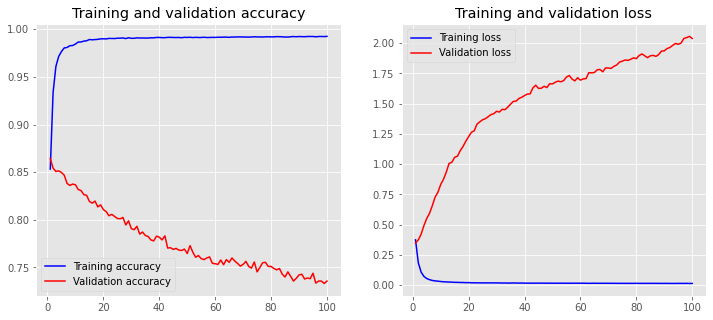

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    x = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training accuracy')
    plt.plot(x, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

## Word Embeddings

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1

print(sentences_train[2])
print(X_train[2])

e100ss gini buka informasi sejelas nya identitas daerah penderita terjangkit infokan masyarakat mengisolasi nya kontak langsung penderita positif corona ditutup tutupi
[1131, 114, 134, 279, 2, 1980, 112, 1619, 429, 39, 4721, 2, 656, 133, 1619, 31, 1, 591, 2616]


In [ ]:
df_train['l'] = df_train["text_a"].apply(lambda x: len(str(x).split(' ')))

q1 = df_train['l'].quantile(.25)
q3 = df_train['l'].quantile(.75)
iqr = q3 - q1
high_outlier_limit = math.floor(q3 + 1.5*iqr)

maxlen = high_outlier_limit
print(maxlen)

40


In [ ]:
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0])

[ 134  531  625  177  759   63    1  123 1676  759    6 1563   15  214
  256  532  759 2767   37   26 2767   70    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


## Word Embeddings: Glove

In [ ]:
def create_embedding_matrix(word_index, embedding_dim):
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open('drive/MyDrive/sentiment labelled sentences/glove.6B.50d.txt') as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                index = word_index[word] 
                embedding_matrix[index] = np.array(vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix


In [ ]:
embedding_matrix = create_embedding_matrix(tokenizer.word_index, embedding_dim=50)

In [ ]:
model = Sequential()
model.add(layers.Embedding(vocab_size, 
                          embedding_dim=50, 
                          weights=[embedding_matrix], 
                          input_length=maxlen, 
                          trainable=False))

model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 40, 50)            2315750   
                                                                 
 global_max_pooling1d_1 (Glo  (None, 50)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 10)                510       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,316,271
Trainable params: 521
Non-trainable params: 2,315,750
_________________________________________________________________


Training Accuracy: 0.7978
Testing Accuracy:  0.7954


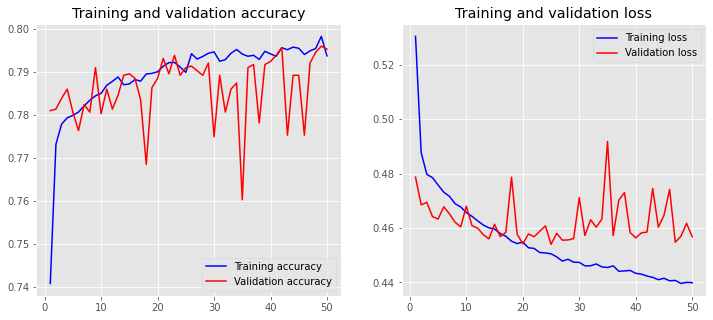

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)


## CNN

### Model dengan Hyperparameter Optimization

In [ ]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

embedding_dim = 100

sentences_train = df_train_key
sentences_test = df_test_key

y_train = df_train_val
y_test = df_test_val

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

param_grid = dict(num_filters=[32, 64, 128], kernel_size=[3, 5, 7], vocab_size=[vocab_size], embedding_dim=[embedding_dim], maxlen=[maxlen])

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=False)

grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, y_train)

test_accuracy = grid.score(X_test, y_test)

print(grid_result.best_score_, grid_result.best_params_, test_accuracy)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Fitting 4 folds for each of 5 candidates, totalling 20 fits


In [ ]:
# history = model.fit(X_train, y_train,
#                     epochs=50,
#                     verbose=False,
#                     validation_data=(X_test, y_test),
#                     batch_size=10)
# loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
# print("Testing Accuracy:  {:.4f}".format(accuracy))
# plot_history(history)

In [ ]:
# # diakhir ini
# import numpy as np

# predictions=model.predict(X_test) 
# classes_x=np.argmax(predictions,axis=1)
# predictions

# predictions = ['positive' if item == 1 else 'negative' for item in predictions]
# predictions
# # predictions[10] --> positive
# # X_test